In [34]:
from math import *

def trapezoidal_2d(f, ax, ay, bx, by, h):
    nx = int((bx-ax) / h)
    ny = int((by-ay) / h)
    integral = 0

    for i in range(nx+1):
        for k in range(ny+1):
            l = f(ax+i*h, ay+k*h) * h**2
            if i == 0 or i == nx:
                l /= 2
            if k == 0 or k == ny:
                l /= 2
            integral += l
    return integral


def adaptive_trapezoidal_2d(f, ax, ay, bx, by, delta):
    h = 10**-1
    ny = (by-ay)/h
    nx = (bx-ax)/h
    I_1 = trapezoidal_2d(f, ax, ay, bx, by, h)
    err = 1000
    while err > delta:
        h /= 2
        nx *= 2
        ny *= 2
        next_int = I_1/2 + h*(sum([f(ax+k*h, ay) for k in range(1, int(nx), 2)]))+ h*(sum([f(ax, ay+k*h) for k in range(1, int(ny), 2)]))
        err = abs(next_int - I_1)/3
        if err < delta:
            
            return next_int, err
        else:
            I_1 = next_int


In [35]:
def rho(x, y):
    if x == 1/2 and -1/2 <= y <= 1/2:
        return 1
    elif x == -1/2 and -1/2 <= y <= 1/2:
        return 1
    elif y == 1/2 and -1/2 <= x <= 1/2:
        return 1
    elif y == -1/2 and -1/2 <= x <= 1/2:
        return 1
    else:
        return 0

In [36]:
def function_to_integrate_00(x,y):
    a, b = 0,0
    r = [a,b]
    rprime = [x,y]
    dist = sqrt(sum([(a-x)**2, (b-y)**2]))
    try:
        return rho(x, y)/(dist)
    except Exception as e:
        pass

In [37]:
print("The total field at point(x, y) = (0, 0) is {}".format(
    adaptive_trapezoidal_2d(function_to_integrate_00, -1/2, -1/2, -1/2, 1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_00, -1/2, -1/2, 1/2, -1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_00, 1/2, -1/2, 1/2, 1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_00, -1/2, 1/2, 1/2, 1/2, 10**-3)[0]))

The total field at point(x, y) = (0, 0) is 7.044455993621723


In [38]:
def function_to_integrate_140(x,y):
    a, b = 1/4,0
    r = [a,b]
    rprime = [x,y]
    dist = sqrt(sum([(a-x)**2, (b-y)**2]))
    try:
        return rho(x, y)/(dist)
    except Exception as e:
        pass

In [39]:
print("The total field at point(x, y) = (1/4, 0) is {}".format(
    adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, -1/2, -1/2, 1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, -1/2, 1/2, -1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_140, 1/2, -1/2, 1/2, 1/2, 10**-3)[0]
    + adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, 1/2, 1/2, 1/2, 10**-3)[0]))

The total field at point(x, y) = (1/4, 0) is 7.48141337676725


In [43]:
from numpy import zeros, linspace
import multiprocessing as mp

phi = []
SIZE = 2


for i, loc1 in enumerate(linspace(-SIZE, SIZE, 100)):
    def worker(tup):
        
        j = tup[0] 
        loc2 = tup[1]
        def function_to_integrate_140(x,y):
            a, b = loc1,loc2
            r = [a,b]
            rprime = [x,y]
            dist = sqrt(sum([(a-x)**2, (b-y)**2]))
            try:
                return rho(x, y)/(dist)
            except Exception as e:
                pass
            
        def total_integral(x, y):
            inte = adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, -1/2, -1/2, 1/2, 10**-3)[0] + adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, -1/2, 1/2, -1/2, 10**-3)[0]+ adaptive_trapezoidal_2d(function_to_integrate_140, 1/2, -1/2, 1/2, 1/2, 10**-3)[0]+ adaptive_trapezoidal_2d(function_to_integrate_140, -1/2, 1/2, 1/2, 1/2, 10**-3)[0]
            if y == 0:
                print("{}.{} percent complete".format(x, y))
            return  inte
        
        return total_integral(i, j)
        
    pool = mp.Pool()
    phis = pool.map(worker, enumerate(linspace(-SIZE, SIZE, 100)))
    phi.append(phis)
    pool.close()

0.0 percent complete
1.0 percent complete
2.0 percent complete
3.0 percent complete
4.0 percent complete
5.0 percent complete
6.0 percent complete
7.0 percent complete
8.0 percent complete
9.0 percent complete
10.0 percent complete
11.0 percent complete
12.0 percent complete
13.0 percent complete
14.0 percent complete
15.0 percent complete
16.0 percent complete
17.0 percent complete
18.0 percent complete
19.0 percent complete
20.0 percent complete
21.0 percent complete
22.0 percent complete
23.0 percent complete
24.0 percent complete
25.0 percent complete
26.0 percent complete
27.0 percent complete
28.0 percent complete
29.0 percent complete
30.0 percent complete
31.0 percent complete
32.0 percent complete
33.0 percent complete
34.0 percent complete
35.0 percent complete
36.0 percent complete
37.0 percent complete
38.0 percent complete
39.0 percent complete
40.0 percent complete
41.0 percent complete
42.0 percent complete
43.0 percent complete
44.0 percent complete
45.0 percent complet

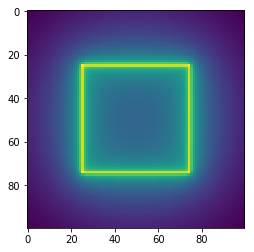

In [45]:
from pylab import *
%matplotlib inline 
imshow(phi)

In [ ]:
## AFTER THE PHI EXISTS, THIS PART SHOULD JUST WORK. TRANSLATE X,Y TO POINTS IN PHI

def dVdx(x,y):
    h = 1
    return (phi[x+h][y] - phi[x][y])/h

def dVdy(x,y):
    h = 1
    return (phi[x][y+h] - phi[x][y])/h

def E(x,y):
    return (-(dVdx(x,y)), -(dVdy(x,y)))

